# Prática 2 - Análise de Dados de Voos

## Objetivo
Este notebook tem como objetivo realizar uma análise exploratória dos dados de voos contidos no dataset sintético, aplicando técnicas de ciência de dados para extrair insights sobre pontualidade, rotas, companhias aéreas e padrões de voo.

## Dataset
- **Arquivo**: atividade3 - Dataset_sintético_de_voos.csv
- **Período**: 2023
- **Variáveis**: Data do voo, companhia aérea, número da aeronave, origem, destino, horário programado, atrasos de partida e chegada, distância

## 1. Importação das Bibliotecas e Carregamento dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Carregamento dos dados
# O arquivo está na mesma pasta do notebook
df = pd.read_csv('atividade3 - Dataset_sint_tico_de_voos.csv')

print(f"Dataset carregado com sucesso!")
print(f"Dimensões do dataset: {df.shape}")
print(f"Colunas: {list(df.columns)}")

Dataset carregado com sucesso!
Dimensões do dataset: (100, 9)
Colunas: ['FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE']


## 2. Análise Exploratória Inicial

In [3]:
# Visualização das primeiras linhas
print("Primeiras 10 linhas do dataset:")
display(df.head(10))

Primeiras 10 linhas do dataset:


,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710
5,2023-01-06,LATAM,N1005,GRU,SFO,1843,52.0,-24.0,584
6,2023-01-07,LATAM,N1006,GRU,SFO,488,-16.0,-15.0,604
7,2023-01-08,AZUL,N1007,LAX,SFO,1959,-21.0,43.0,4813
8,2023-01-09,DL,N1008,BSB,SFO,1663,36.0,37.0,4771
9,2023-01-10,UA,N1009,GRU,FOR,640,-3.0,-64.0,2200


In [4]:
# Informações gerais sobre o dataset
print("Informações gerais do dataset:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Estatísticas descritivas:")
display(df.describe())

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FL_DATE            100 non-null    object 
 1   OP_UNIQUE_CARRIER  100 non-null    object 
 2   TAIL_NUM           100 non-null    object 
 3   ORIGIN             100 non-null    object 
 4   DEST               100 non-null    object 
 5   CRS_DEP_TIME       100 non-null    int64  
 6   DEP_DELAY          90 non-null     float64
 7   ARR_DELAY          90 non-null     float64
 8   DISTANCE           100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB
None


Estatísticas descritivas:


,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
count,100.00000,90.000000,90.000000,100.000000
mean,1242.93000,9.066667,7.688889,2897.620000
std,686.19325,33.684525,39.095574,1420.354052
min,16.00000,-57.000000,-103.000000,337.000000
25%,626.00000,-15.000000,-20.500000,1859.250000
50%,1230.50000,7.000000,6.000000,2940.000000
75%,1812.25000,33.250000,36.250000,4266.000000
max,2331.00000,106.000000,90.000000,4984.000000


In [5]:
# Verificação de valores nulos
print("Valores nulos por coluna:")
nulos = df.isnull().sum()
print(nulos)
print(f"\nPercentual de valores nulos:")
print((nulos / len(df) * 100).round(2))

Valores nulos por coluna:
FL_DATE               0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_DELAY            10
ARR_DELAY            10
DISTANCE              0
dtype: int64

Percentual de valores nulos:
FL_DATE               0.0
OP_UNIQUE_CARRIER     0.0
TAIL_NUM              0.0
ORIGIN                0.0
DEST                  0.0
CRS_DEP_TIME          0.0
DEP_DELAY            10.0
ARR_DELAY            10.0
DISTANCE              0.0
dtype: float64


## 3. Preparação e Limpeza dos Dados

In [6]:
# Conversão da coluna de data
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Criação de colunas auxiliares
df['YEAR'] = df['FL_DATE'].dt.year
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek
df['MONTH_NAME'] = df['FL_DATE'].dt.month_name()
df['WEEKDAY_NAME'] = df['FL_DATE'].dt.day_name()

# Mapeamento dos dias da semana em português
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira', 
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

meses = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril'
}

df['WEEKDAY_NAME_PT'] = df['WEEKDAY_NAME'].map(dias_semana)
df['MONTH_NAME_PT'] = df['MONTH_NAME'].map(meses)

print("Dados preparados com sucesso!")
print(f"Período dos dados: {df['FL_DATE'].min()} a {df['FL_DATE'].max()}")

Dados preparados com sucesso!
Período dos dados: 2023-01-01 00:00:00 a 2023-04-10 00:00:00


In [7]:
# Tratamento de valores nulos
print("Análise dos valores nulos em DEP_DELAY e ARR_DELAY:")
print(f"DEP_DELAY nulos: {df['DEP_DELAY'].isnull().sum()}")
print(f"ARR_DELAY nulos: {df['ARR_DELAY'].isnull().sum()}")

# Para análises que não envolvem atrasos, podemos manter os nulos
# Para análises específicas de atrasos, criaremos um subset
df_clean = df.dropna(subset=['DEP_DELAY', 'ARR_DELAY'])
print(f"\nDataset limpo (sem nulos em atrasos): {df_clean.shape[0]} registros")

Análise dos valores nulos em DEP_DELAY e ARR_DELAY:
DEP_DELAY nulos: 10
ARR_DELAY nulos: 10

Dataset limpo (sem nulos em atrasos): 80 registros


## 4. Análise das Companhias Aéreas

Distribuição de voos por companhia aérea:
OP_UNIQUE_CARRIER
SW       21
DL       17
AZUL     16
GOL      15
LATAM    12
UA       11
AA        8
Name: count, dtype: int64


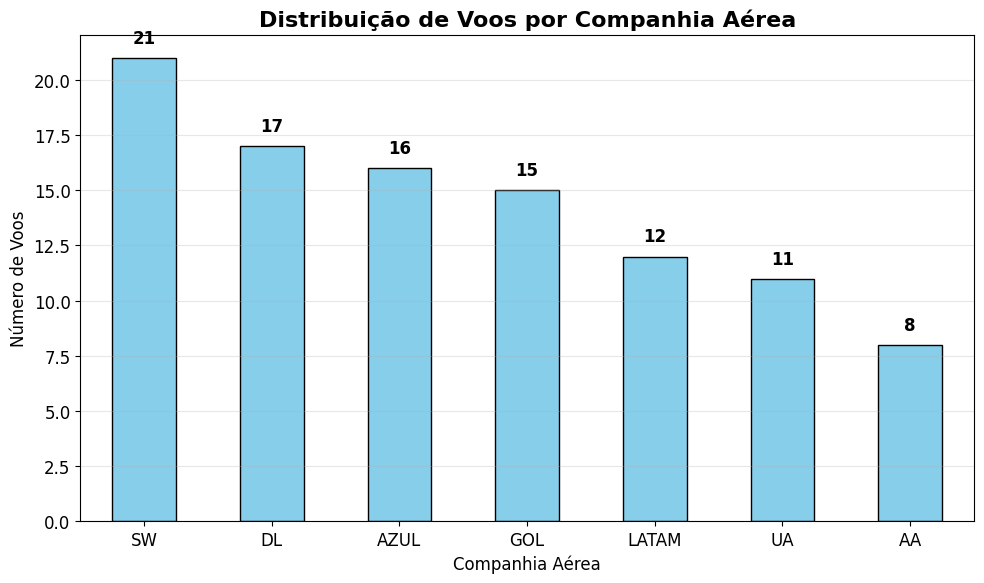

In [8]:
# Análise das companhias aéreas
print("Distribuição de voos por companhia aérea:")
cia_counts = df['OP_UNIQUE_CARRIER'].value_counts()
print(cia_counts)

# Gráfico de barras
plt.figure(figsize=(10, 6))
cia_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Voos por Companhia Aérea', fontsize=16, fontweight='bold')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(cia_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Análise de Rotas e Destinos

In [9]:
# Análise dos aeroportos de origem mais movimentados
print("Top 10 Aeroportos de Origem:")
origem_counts = df['ORIGIN'].value_counts().head(10)
print(origem_counts)

# Análise dos aeroportos de destino mais movimentados
print("\nTop 10 Aeroportos de Destino:")
destino_counts = df['DEST'].value_counts().head(10)
print(destino_counts)

Top 10 Aeroportos de Origem:
ORIGIN
BSB    21
GRU    17
JFK    16
ATL    15
ORD    13
LAX    10
GIG     8
Name: count, dtype: int64

Top 10 Aeroportos de Destino:
DEST
MIA    21
SFO    19
FOR    18
DFW    15
SSA    10
SEA     9
REC     8
Name: count, dtype: int64


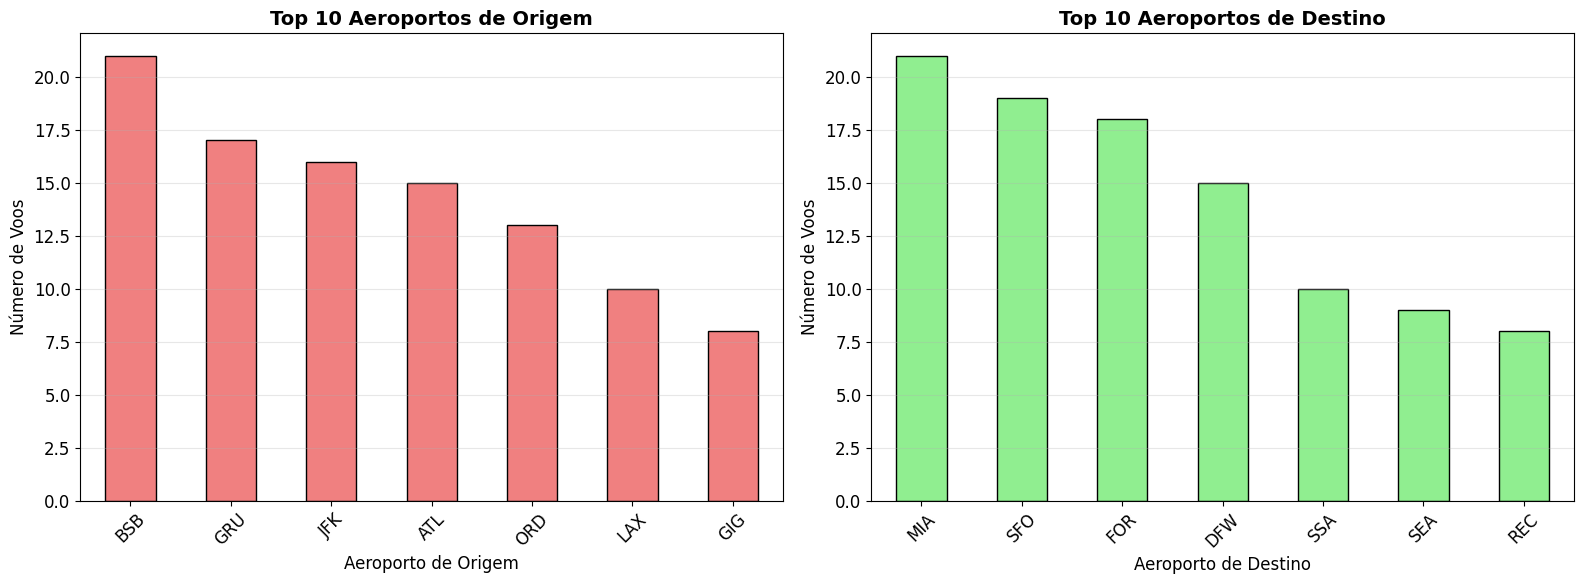

In [10]:
# Visualização dos aeroportos mais movimentados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de origem
origem_counts.plot(kind='bar', ax=ax1, color='lightcoral', edgecolor='black')
ax1.set_title('Top 10 Aeroportos de Origem', fontsize=14, fontweight='bold')
ax1.set_xlabel('Aeroporto de Origem')
ax1.set_ylabel('Número de Voos')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Gráfico de destino
destino_counts.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Top 10 Aeroportos de Destino', fontsize=14, fontweight='bold')
ax2.set_xlabel('Aeroporto de Destino')
ax2.set_ylabel('Número de Voos')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Top 10 Rotas Mais Populares:
 1. GRU → SFO: 7 voos
 2. JFK → FOR: 5 voos
 3. BSB → MIA: 5 voos
 4. GRU → MIA: 5 voos
 5. LAX → SFO: 4 voos
 6. ATL → DFW: 4 voos
 7. BSB → SEA: 4 voos
 8. BSB → DFW: 4 voos
 9. GRU → FOR: 3 voos
10. JFK → DFW: 3 voos


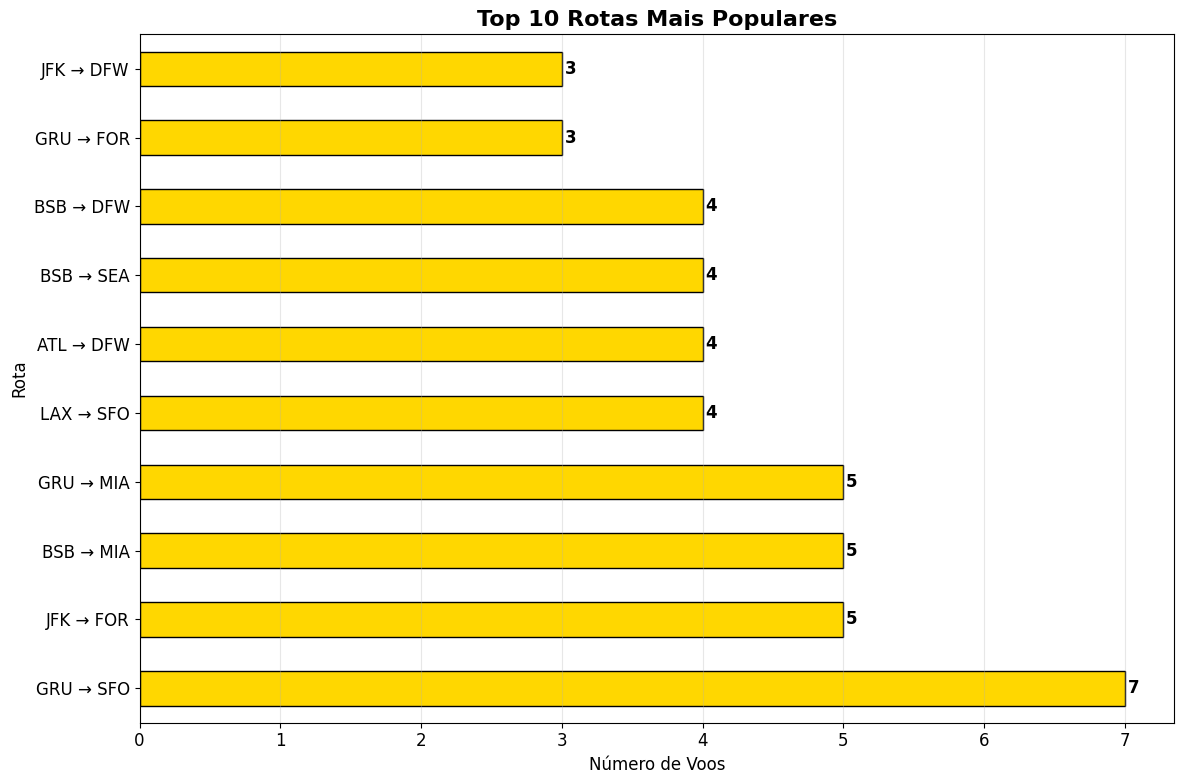

In [11]:
# Análise das rotas mais populares
df['ROTA'] = df['ORIGIN'] + ' → ' + df['DEST']
rotas_populares = df['ROTA'].value_counts().head(10)

print("Top 10 Rotas Mais Populares:")
for i, (rota, count) in enumerate(rotas_populares.items(), 1):
    print(f"{i:2d}. {rota}: {count} voos")

# Visualização
plt.figure(figsize=(12, 8))
rotas_populares.plot(kind='barh', color='gold', edgecolor='black')
plt.title('Top 10 Rotas Mais Populares', fontsize=16, fontweight='bold')
plt.xlabel('Número de Voos')
plt.ylabel('Rota')
plt.grid(axis='x', alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(rotas_populares.values):
    plt.text(v + 0.02, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Análise de Pontualidade e Atrasos

In [12]:
# Análise de atrasos - usando o dataset limpo
print("Estatísticas de Atrasos:")
print("\nAtraso de Partida (DEP_DELAY):")
print(f"Média: {df_clean['DEP_DELAY'].mean():.2f} minutos")
print(f"Mediana: {df_clean['DEP_DELAY'].median():.2f} minutos")
print(f"Desvio Padrão: {df_clean['DEP_DELAY'].std():.2f} minutos")

print("\nAtraso de Chegada (ARR_DELAY):")
print(f"Média: {df_clean['ARR_DELAY'].mean():.2f} minutos")
print(f"Mediana: {df_clean['ARR_DELAY'].median():.2f} minutos")
print(f"Desvio Padrão: {df_clean['ARR_DELAY'].std():.2f} minutos")

Estatísticas de Atrasos:

Atraso de Partida (DEP_DELAY):
Média: 10.62 minutos
Mediana: 7.50 minutos
Desvio Padrão: 34.09 minutos

Atraso de Chegada (ARR_DELAY):
Média: 4.95 minutos
Mediana: 4.50 minutos
Desvio Padrão: 39.38 minutos


In [13]:
# Classificação de pontualidade
def classificar_pontualidade(atraso):
    if pd.isna(atraso):
        return 'Sem dados'
    elif atraso <= 0:
        return 'No horário/Adiantado'
    elif atraso <= 15:
        return 'Atraso pequeno (≤15 min)'
    elif atraso <= 60:
        return 'Atraso moderado (16-60 min)'
    else:
        return 'Atraso grande (>60 min)'

df['PONTUALIDADE_PARTIDA'] = df['DEP_DELAY'].apply(classificar_pontualidade)
df['PONTUALIDADE_CHEGADA'] = df['ARR_DELAY'].apply(classificar_pontualidade)

print("Distribuição de Pontualidade - Partida:")
pont_partida = df['PONTUALIDADE_PARTIDA'].value_counts()
print(pont_partida)
print(f"\nPercentuais:")
print((pont_partida / len(df) * 100).round(1))

Distribuição de Pontualidade - Partida:
PONTUALIDADE_PARTIDA
No horário/Adiantado           41
Atraso moderado (16-60 min)    32
Atraso pequeno (≤15 min)       11
Sem dados                      10
Atraso grande (>60 min)         6
Name: count, dtype: int64

Percentuais:
PONTUALIDADE_PARTIDA
No horário/Adiantado           41.0
Atraso moderado (16-60 min)    32.0
Atraso pequeno (≤15 min)       11.0
Sem dados                      10.0
Atraso grande (>60 min)         6.0
Name: count, dtype: float64


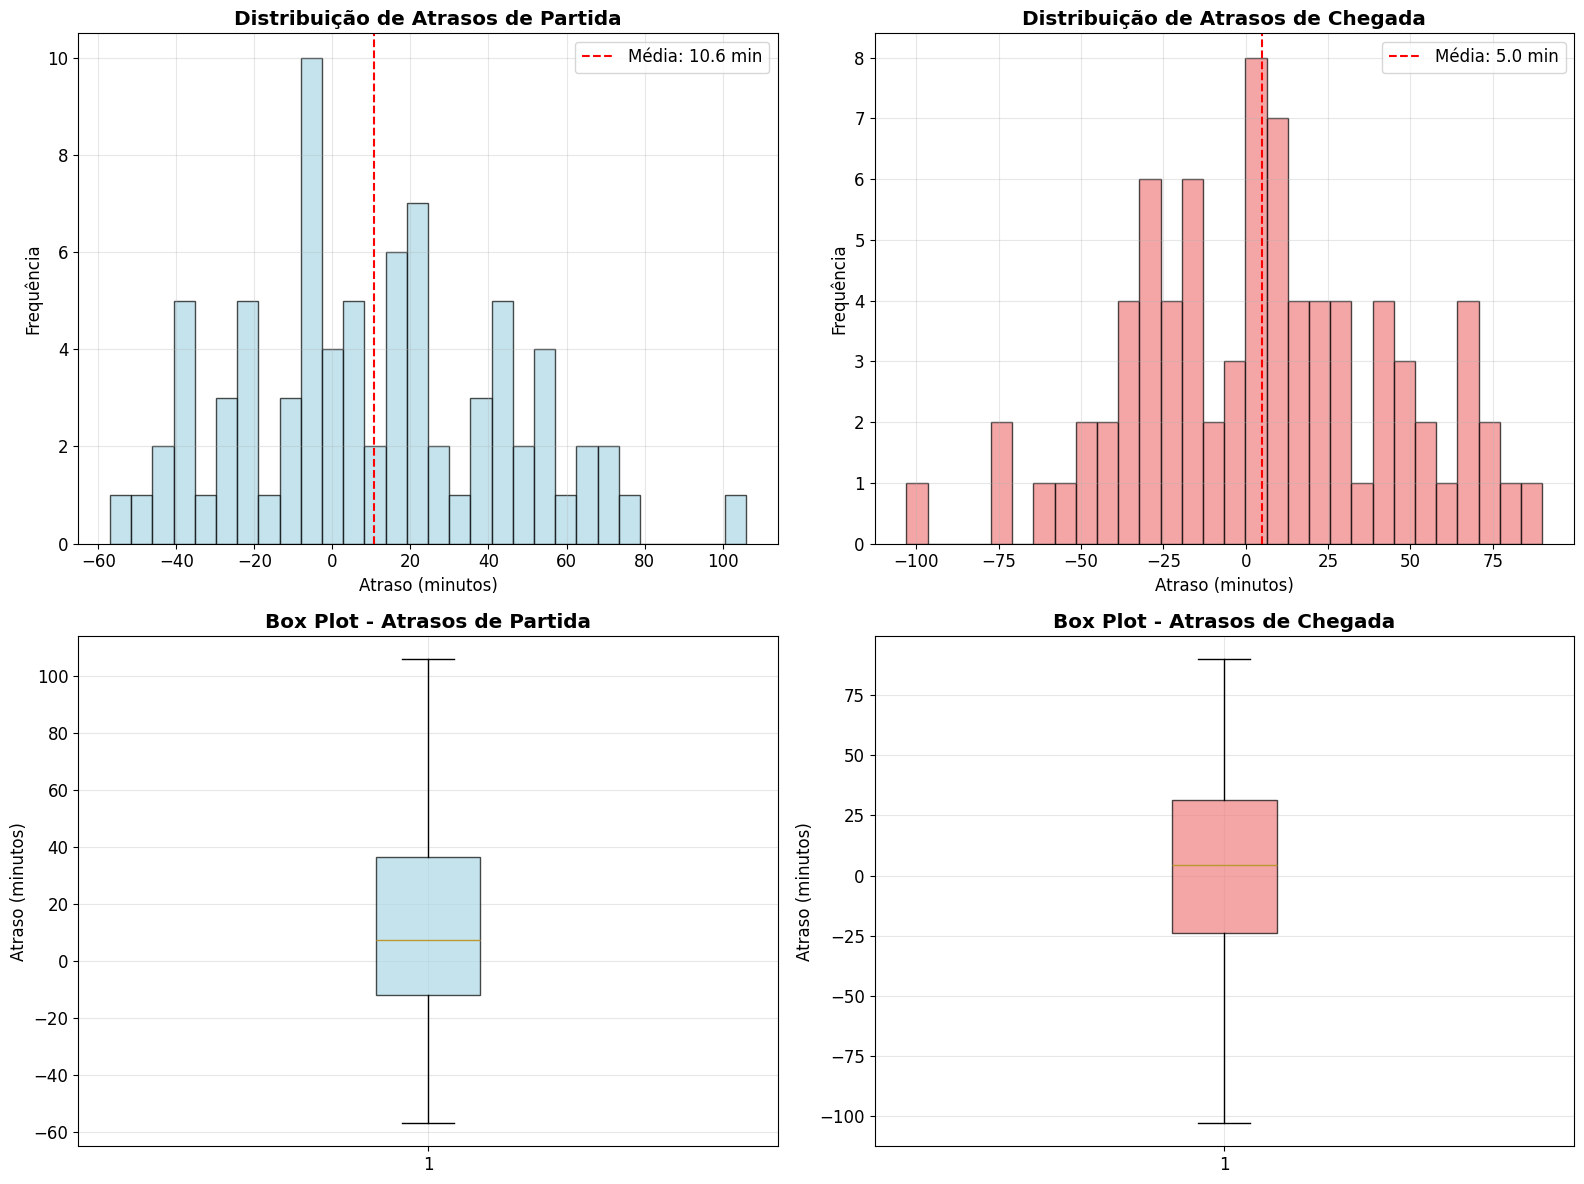

In [14]:
# Visualização da distribuição de atrasos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de atrasos de partida
axes[0,0].hist(df_clean['DEP_DELAY'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribuição de Atrasos de Partida', fontweight='bold')
axes[0,0].set_xlabel('Atraso (minutos)')
axes[0,0].set_ylabel('Frequência')
axes[0,0].grid(alpha=0.3)
axes[0,0].axvline(df_clean['DEP_DELAY'].mean(), color='red', linestyle='--', label=f'Média: {df_clean["DEP_DELAY"].mean():.1f} min')
axes[0,0].legend()

# Histograma de atrasos de chegada
axes[0,1].hist(df_clean['ARR_DELAY'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribuição de Atrasos de Chegada', fontweight='bold')
axes[0,1].set_xlabel('Atraso (minutos)')
axes[0,1].set_ylabel('Frequência')
axes[0,1].grid(alpha=0.3)
axes[0,1].axvline(df_clean['ARR_DELAY'].mean(), color='red', linestyle='--', label=f'Média: {df_clean["ARR_DELAY"].mean():.1f} min')
axes[0,1].legend()

# Boxplot de atrasos de partida
axes[1,0].boxplot(df_clean['DEP_DELAY'].dropna(), patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1,0].set_title('Box Plot - Atrasos de Partida', fontweight='bold')
axes[1,0].set_ylabel('Atraso (minutos)')
axes[1,0].grid(alpha=0.3)

# Boxplot de atrasos de chegada
axes[1,1].boxplot(df_clean['ARR_DELAY'].dropna(), patch_artist=True,
                  boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1,1].set_title('Box Plot - Atrasos de Chegada', fontweight='bold')
axes[1,1].set_ylabel('Atraso (minutos)')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Análise por Companhia Aérea

In [15]:
# Análise de pontualidade por companhia aérea
pontualidade_cia = df_clean.groupby('OP_UNIQUE_CARRIER').agg({
    'DEP_DELAY': ['mean', 'median', 'std', 'count'],
    'ARR_DELAY': ['mean', 'median', 'std']
}).round(2)

pontualidade_cia.columns = ['Atraso_Partida_Média', 'Atraso_Partida_Mediana', 'Atraso_Partida_Desvio', 'Num_Voos',
                           'Atraso_Chegada_Média', 'Atraso_Chegada_Mediana', 'Atraso_Chegada_Desvio']

print("Análise de Pontualidade por Companhia Aérea:")
display(pontualidade_cia.sort_values('Atraso_Partida_Média'))

Análise de Pontualidade por Companhia Aérea:


,Atraso_Partida_Média,Atraso_Partida_Mediana,Atraso_Partida_Desvio,Num_Voos,Atraso_Chegada_Média,Atraso_Chegada_Mediana,Atraso_Chegada_Desvio
OP_UNIQUE_CARRIER,,,,,,,
UA,-13.50,-10.0,18.45,8,0.75,3.5,43.55
SW,9.75,19.0,33.88,16,-11.81,-13.0,42.43
DL,11.47,7.0,41.43,15,6.27,3.0,38.13
AZUL,12.29,18.5,32.10,14,7.29,8.5,36.97
LATAM,12.60,13.5,27.15,10,19.10,22.5,26.08
GOL,15.27,-0.0,40.78,11,10.00,4.0,47.26
AA,27.33,13.5,31.10,6,13.67,3.5,40.49


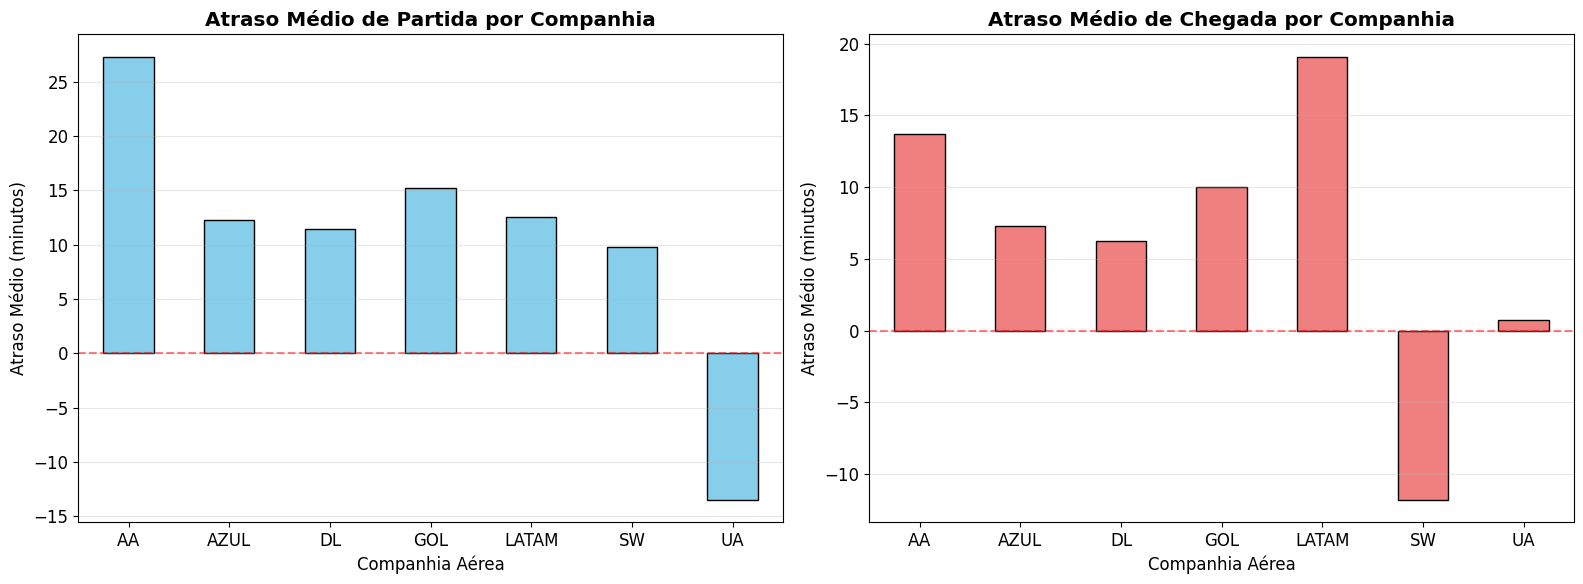

In [16]:
# Gráfico de atrasos médios por companhia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Atraso médio de partida
pontualidade_cia['Atraso_Partida_Média'].plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Atraso Médio de Partida por Companhia', fontweight='bold')
ax1.set_xlabel('Companhia Aérea')
ax1.set_ylabel('Atraso Médio (minutos)')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Atraso médio de chegada
pontualidade_cia['Atraso_Chegada_Média'].plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Atraso Médio de Chegada por Companhia', fontweight='bold')
ax2.set_xlabel('Companhia Aérea')
ax2.set_ylabel('Atraso Médio (minutos)')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 8. Análise Temporal

In [17]:
# Análise por mês
voos_por_mes = df.groupby('MONTH_NAME_PT').size()
print("Distribuição de voos por mês:")
print(voos_por_mes)

# Análise por dia da semana
voos_por_dia = df.groupby('WEEKDAY_NAME_PT').size()
print("\nDistribuição de voos por dia da semana:")
print(voos_por_dia)

Distribuição de voos por mês:
MONTH_NAME_PT
Abril        10
Fevereiro    28
Janeiro      31
Março        31
dtype: int64

Distribuição de voos por dia da semana:
WEEKDAY_NAME_PT
Domingo          15
Quarta-feira     14
Quinta-feira     14
Segunda-feira    15
Sexta-feira      14
Sábado           14
Terça-feira      14
dtype: int64


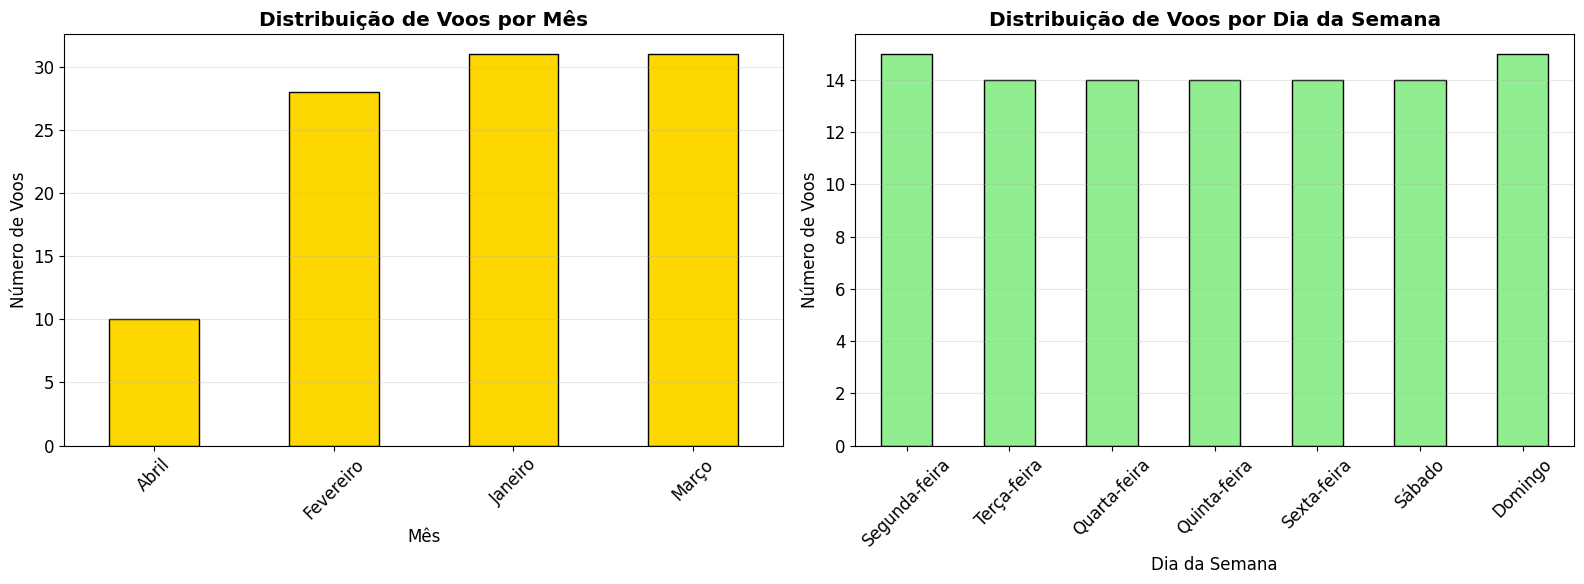

In [18]:
# Visualização temporal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico por mês
voos_por_mes.plot(kind='bar', ax=ax1, color='gold', edgecolor='black')
ax1.set_title('Distribuição de Voos por Mês', fontweight='bold')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Número de Voos')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Gráfico por dia da semana
# Ordenando os dias da semana
ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
voos_por_dia_ordenado = voos_por_dia.reindex(ordem_dias)

voos_por_dia_ordenado.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Distribuição de Voos por Dia da Semana', fontweight='bold')
ax2.set_xlabel('Dia da Semana')
ax2.set_ylabel('Número de Voos')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Análise de Distâncias

In [19]:
# Análise de distâncias
print("Estatísticas de Distância:")
print(f"Distância média: {df['DISTANCE'].mean():.0f} milhas")
print(f"Distância mediana: {df['DISTANCE'].median():.0f} milhas")
print(f"Distância mínima: {df['DISTANCE'].min():.0f} milhas")
print(f"Distância máxima: {df['DISTANCE'].max():.0f} milhas")
print(f"Desvio padrão: {df['DISTANCE'].std():.0f} milhas")

# Classificação por distância
def classificar_distancia(distancia):
    if distancia < 1000:
        return 'Curta (< 1000 mi)'
    elif distancia < 3000:
        return 'Média (1000-3000 mi)'
    else:
        return 'Longa (> 3000 mi)'

df['CATEGORIA_DISTANCIA'] = df['DISTANCE'].apply(classificar_distancia)
dist_categoria = df['CATEGORIA_DISTANCIA'].value_counts()
print("\nDistribuição por categoria de distância:")
print(dist_categoria)

Estatísticas de Distância:
Distância média: 2898 milhas
Distância mediana: 2940 milhas
Distância mínima: 337 milhas
Distância máxima: 4984 milhas
Desvio padrão: 1420 milhas

Distribuição por categoria de distância:
CATEGORIA_DISTANCIA
Longa (> 3000 mi)       49
Média (1000-3000 mi)    36
Curta (< 1000 mi)       15
Name: count, dtype: int64


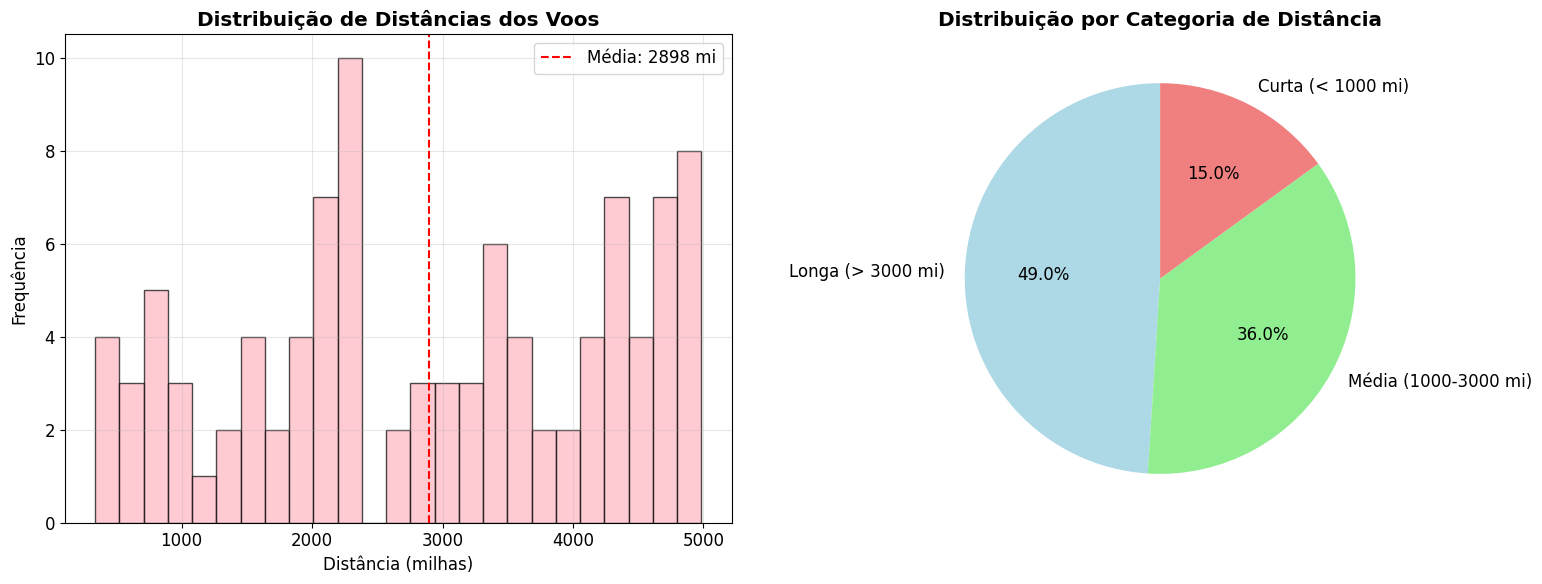

In [20]:
# Visualização de distâncias
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de distâncias
ax1.hist(df['DISTANCE'], bins=25, color='lightpink', edgecolor='black', alpha=0.7)
ax1.set_title('Distribuição de Distâncias dos Voos', fontweight='bold')
ax1.set_xlabel('Distância (milhas)')
ax1.set_ylabel('Frequência')
ax1.grid(alpha=0.3)
ax1.axvline(df['DISTANCE'].mean(), color='red', linestyle='--', label=f'Média: {df["DISTANCE"].mean():.0f} mi')
ax1.legend()

# Gráfico de pizza - categorias de distância
ax2.pie(dist_categoria.values, labels=dist_categoria.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
ax2.set_title('Distribuição por Categoria de Distância', fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Correlações e Insights

Matriz de Correlação:


,DEP_DELAY,ARR_DELAY,DISTANCE,CRS_DEP_TIME
DEP_DELAY,1.000,-0.041,0.026,-0.112
ARR_DELAY,-0.041,1.000,0.093,0.115
DISTANCE,0.026,0.093,1.000,-0.008
CRS_DEP_TIME,-0.112,0.115,-0.008,1.000


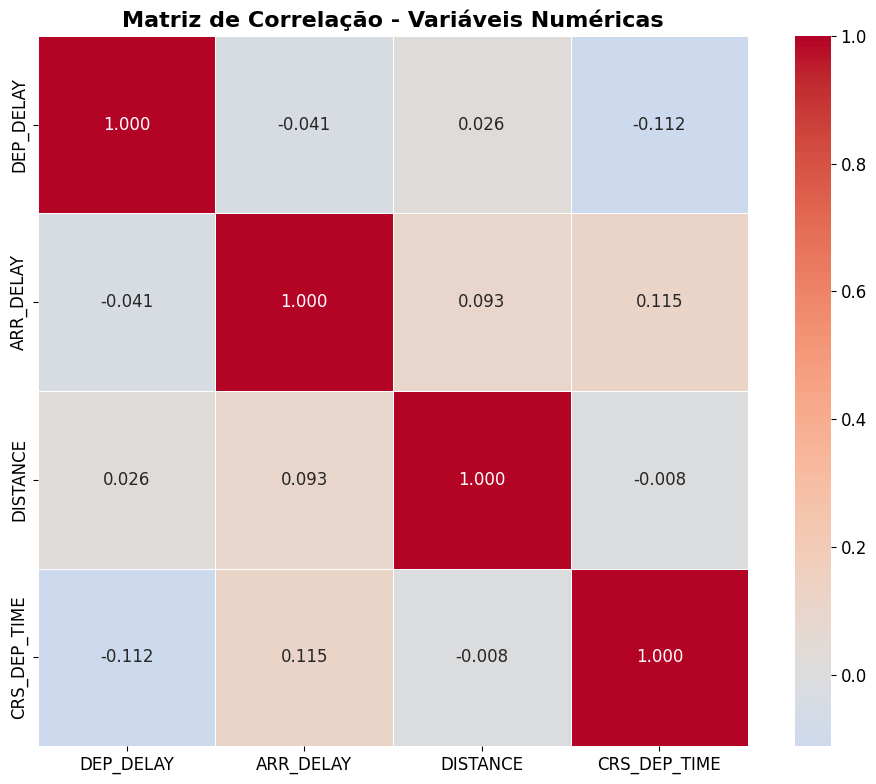

In [21]:
# Análise de correlação entre variáveis numéricas
colunas_numericas = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'CRS_DEP_TIME']
correlacao = df_clean[colunas_numericas].corr()

print("Matriz de Correlação:")
display(correlacao.round(3))

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

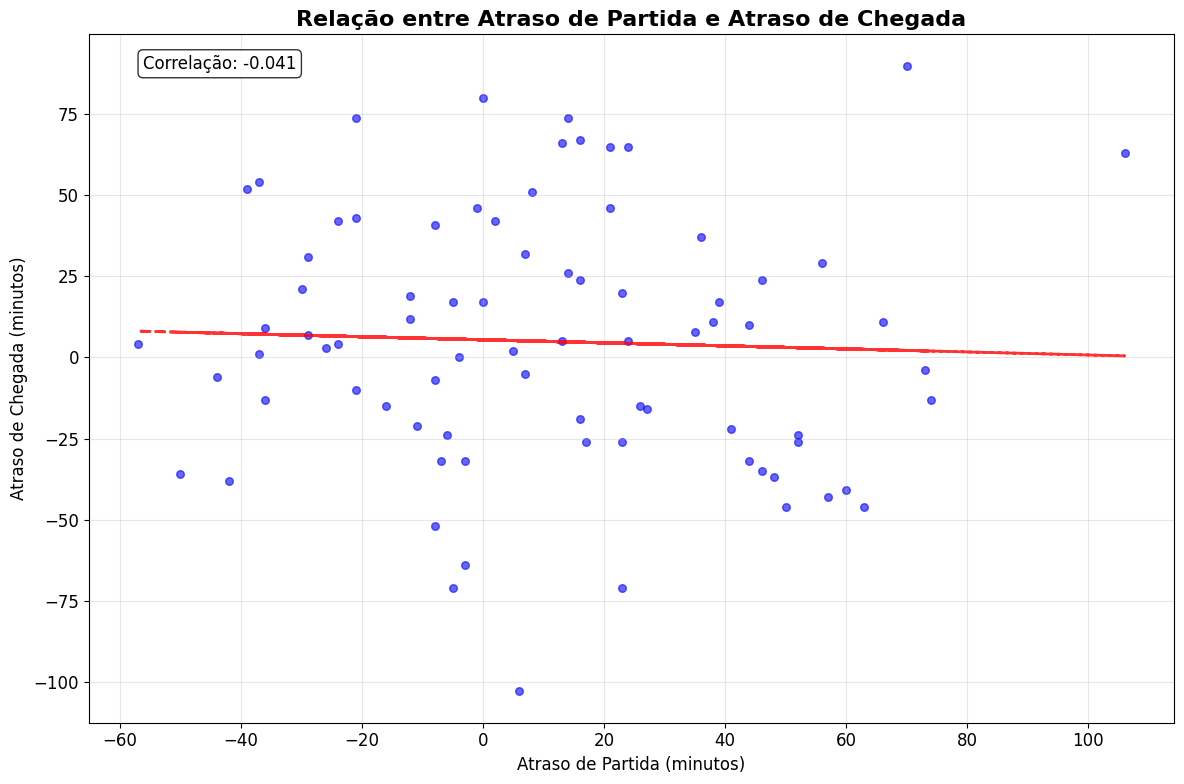

In [22]:
# Scatter plot: Atraso de partida vs Atraso de chegada
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['DEP_DELAY'], df_clean['ARR_DELAY'], alpha=0.6, s=30, color='blue')
plt.xlabel('Atraso de Partida (minutos)')
plt.ylabel('Atraso de Chegada (minutos)')
plt.title('Relação entre Atraso de Partida e Atraso de Chegada', fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)

# Linha de tendência
z = np.polyfit(df_clean['DEP_DELAY'], df_clean['ARR_DELAY'], 1)
p = np.poly1d(z)
plt.plot(df_clean['DEP_DELAY'], p(df_clean['DEP_DELAY']), "r--", alpha=0.8, linewidth=2)

# Correlação
corr_coef = df_clean['DEP_DELAY'].corr(df_clean['ARR_DELAY'])
plt.text(0.05, 0.95, f'Correlação: {corr_coef:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=12)

plt.tight_layout()
plt.show()

## 11. Relatório de Insights e Conclusões

In [23]:
print("="*80)
print("RELATÓRIO DE INSIGHTS - ANÁLISE DE DADOS DE VOOS")
print("="*80)

print("\n1. RESUMO GERAL:")
print(f"   • Total de voos analisados: {len(df):,}")
print(f"   • Período: {df['FL_DATE'].min().strftime('%d/%m/%Y')} a {df['FL_DATE'].max().strftime('%d/%m/%Y')}")
print(f"   • Companhias aéreas: {df['OP_UNIQUE_CARRIER'].nunique()}")
print(f"   • Aeroportos de origem: {df['ORIGIN'].nunique()}")
print(f"   • Aeroportos de destino: {df['DEST'].nunique()}")

print("\n2. PONTUALIDADE:")
if not df_clean.empty:
    voos_no_horario_partida = (df_clean['DEP_DELAY'] <= 0).sum()
    voos_no_horario_chegada = (df_clean['ARR_DELAY'] <= 0).sum()
    print(f"   • Voos que partiram no horário ou adiantados: {voos_no_horario_partida} ({voos_no_horario_partida/len(df_clean)*100:.1f}%)")
    print(f"   • Voos que chegaram no horário ou adiantados: {voos_no_horario_chegada} ({voos_no_horario_chegada/len(df_clean)*100:.1f}%)")
    print(f"   • Atraso médio de partida: {df_clean['DEP_DELAY'].mean():.1f} minutos")
    print(f"   • Atraso médio de chegada: {df_clean['ARR_DELAY'].mean():.1f} minutos")

print("\n3. COMPANHIAS AÉREAS:")
cia_mais_voos = df['OP_UNIQUE_CARRIER'].mode()[0]
print(f"   • Companhia com mais voos: {cia_mais_voos} ({cia_counts[cia_mais_voos]} voos)")
if not pontualidade_cia.empty:
    cia_mais_pontual = pontualidade_cia['Atraso_Partida_Média'].idxmin()
    print(f"   • Companhia mais pontual (partida): {cia_mais_pontual} ({pontualidade_cia.loc[cia_mais_pontual, 'Atraso_Partida_Média']:.1f} min)")

print("\n4. ROTAS:")
rota_mais_popular = rotas_populares.index[0]
print(f"   • Rota mais popular: {rota_mais_popular} ({rotas_populares.iloc[0]} voos)")
print(f"   • Distância média dos voos: {df['DISTANCE'].mean():.0f} milhas")

print("\n5. PADRÕES TEMPORAIS:")
mes_mais_movimentado = voos_por_mes.idxmax()
dia_mais_movimentado = voos_por_dia_ordenado.idxmax()
print(f"   • Mês mais movimentado: {mes_mais_movimentado} ({voos_por_mes[mes_mais_movimentado]} voos)")
print(f"   • Dia da semana mais movimentado: {dia_mais_movimentado} ({voos_por_dia_ordenado[dia_mais_movimentado]} voos)")

if not df_clean.empty:
    print("\n6. CORRELAÇÕES:")
    corr_dep_arr = df_clean['DEP_DELAY'].corr(df_clean['ARR_DELAY'])
    print(f"   • Correlação entre atraso de partida e chegada: {corr_dep_arr:.3f}")
    if corr_dep_arr > 0.7:
        print(f"     → Correlação forte positiva: atrasos na partida tendem a resultar em atrasos na chegada")
    elif corr_dep_arr > 0.3:
        print(f"     → Correlação moderada positiva")
    else:
        print(f"     → Correlação fraca")

print("\n" + "="*80)
print("ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*80)

RELATÓRIO DE INSIGHTS - ANÁLISE DE DADOS DE VOOS

1. RESUMO GERAL:
   • Total de voos analisados: 100
   • Período: 01/01/2023 a 10/04/2023
   • Companhias aéreas: 7
   • Aeroportos de origem: 7
   • Aeroportos de destino: 7

2. PONTUALIDADE:
   • Voos que partiram no horário ou adiantados: 35 (43.8%)
   • Voos que chegaram no horário ou adiantados: 35 (43.8%)
   • Atraso médio de partida: 10.6 minutos
   • Atraso médio de chegada: 5.0 minutos

3. COMPANHIAS AÉREAS:
   • Companhia com mais voos: SW (21 voos)
   • Companhia mais pontual (partida): UA (-13.5 min)

4. ROTAS:
   • Rota mais popular: GRU → SFO (7 voos)
   • Distância média dos voos: 2898 milhas

5. PADRÕES TEMPORAIS:
   • Mês mais movimentado: Janeiro (31 voos)
   • Dia da semana mais movimentado: Segunda-feira (15 voos)

6. CORRELAÇÕES:
   • Correlação entre atraso de partida e chegada: -0.041
     → Correlação fraca

ANÁLISE CONCLUÍDA COM SUCESSO!


## 12. Exportação de Resultados

In [24]:
# Criação de um resumo executivo para exportação
resumo_executivo = {
    'Total_Voos': len(df),
    'Companhias_Aereas': df['OP_UNIQUE_CARRIER'].nunique(),
    'Aeroportos_Origem': df['ORIGIN'].nunique(),
    'Aeroportos_Destino': df['DEST'].nunique(),
    'Distancia_Media_Milhas': df['DISTANCE'].mean(),
    'Atraso_Medio_Partida_Min': df_clean['DEP_DELAY'].mean() if not df_clean.empty else None,
    'Atraso_Medio_Chegada_Min': df_clean['ARR_DELAY'].mean() if not df_clean.empty else None,
    'Companhia_Mais_Voos': cia_counts.index[0],
    'Rota_Mais_Popular': rotas_populares.index[0],
    'Mes_Mais_Movimentado': voos_por_mes.idxmax(),
    'Dia_Semana_Mais_Movimentado': voos_por_dia_ordenado.idxmax()
}

# Convertendo para DataFrame
resumo_df = pd.DataFrame([resumo_executivo]).T
resumo_df.columns = ['Valor']
resumo_df.index.name = 'Métrica'

print("Resumo Executivo da Análise:")
display(resumo_df)

# Salvando em CSV
resumo_df.to_csv('resumo_analise_voos.csv')
print("\nResumo salvo em 'resumo_analise_voos.csv'")

# Salvando tabela de pontualidade por companhia
if not pontualidade_cia.empty:
    pontualidade_cia.to_csv('pontualidade_por_companhia.csv')
    print("Análise de pontualidade salva em 'pontualidade_por_companhia.csv'")

Resumo Executivo da Análise:


,Valor
Métrica,
Total_Voos,100
Companhias_Aereas,7
Aeroportos_Origem,7
Aeroportos_Destino,7
Distancia_Media_Milhas,2897.62
Atraso_Medio_Partida_Min,10.625
Atraso_Medio_Chegada_Min,4.95
Companhia_Mais_Voos,SW
Rota_Mais_Popular,GRU → SFO



Resumo salvo em 'resumo_analise_voos.csv'
Análise de pontualidade salva em 'pontualidade_por_companhia.csv'


---

## Conclusão

Esta análise exploratória dos dados de voos proporcionou insights valiosos sobre:

1. **Pontualidade**: Identificamos padrões de atrasos e companhias mais pontuais
2. **Rotas**: Mapeamos as rotas mais populares e aeroportos mais movimentados
3. **Sazonalidade**: Observamos variações temporais nos volumes de voos
4. **Correlações**: Encontramos relações entre diferentes variáveis

Os dados analisados fornecem uma base sólida para tomadas de decisão na indústria de aviação, permitindo otimizações operacionais e melhorias na experiência do passageiro.

**Próximos passos sugeridos:**
- Análise preditiva de atrasos
- Análise de causa raiz dos atrasos
- Otimização de rotas
- Análise de sazonalidade mais detalhada